trying to predict loan status given various features of the lendees from lending club`

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data=pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(data.loc[col_name]['Description'])

In [7]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [11]:
df=pd.read_csv('DATA/lending_club_loan_two.csv')

## EDA

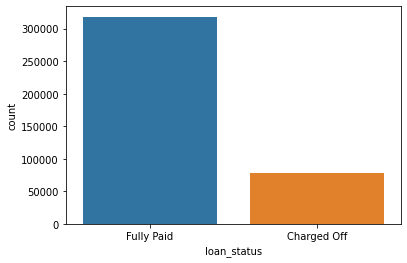

In [12]:
sns.countplot(data=df,x='loan_status')

imbalance in labels we are trying to predict. Way more fully paid then charged off

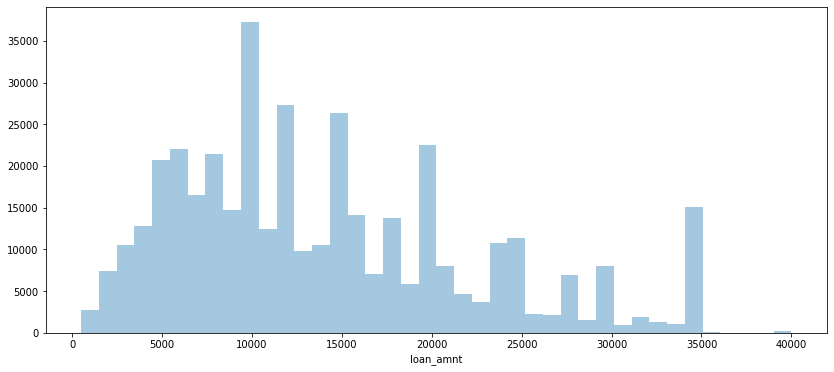

In [14]:
plt.figure(figsize=(14,6))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

large bins appear to suggest lending tree had standard loan values

In [15]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

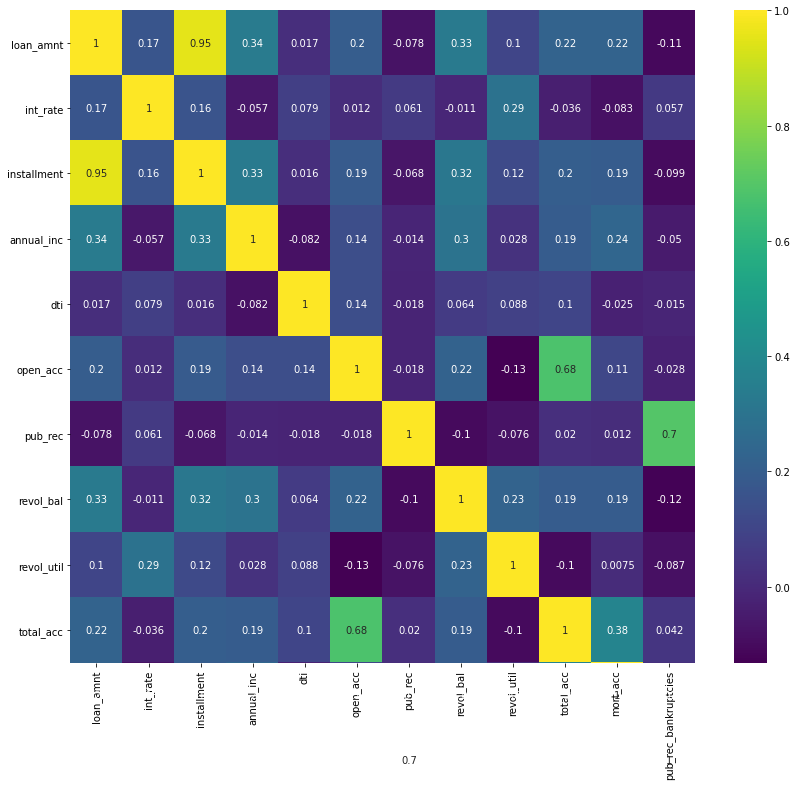

In [22]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10,0)

wow, large correlation between loan amount and installments

In [23]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [25]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


high loan, high monthly installments expected, so they should be very highly correlated

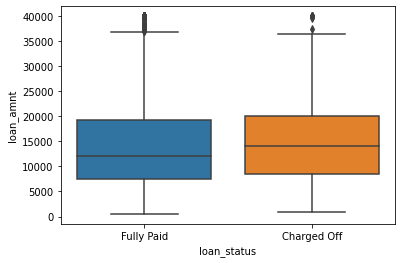

In [26]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [29]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


the loans that were failed to be paid off on average were higher than the succefully paid off loans, but not drastically

In [31]:
feat_info('grade')

LC assigned loan grade


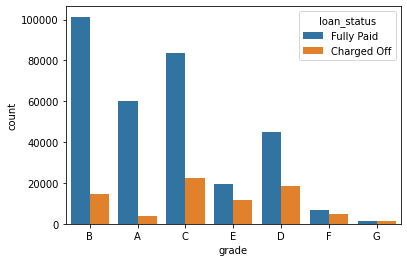

In [30]:
sns.countplot(x='grade',data=df,hue='loan_status')

theres also subgrades

In [35]:
order=sorted(df['sub_grade'].unique())

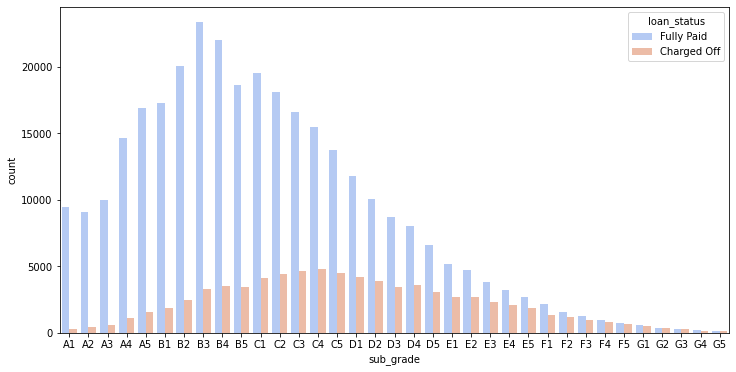

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df,order=order,palette='coolwarm',hue='loan_status')

f and g grades are alomst 50% paid off or not

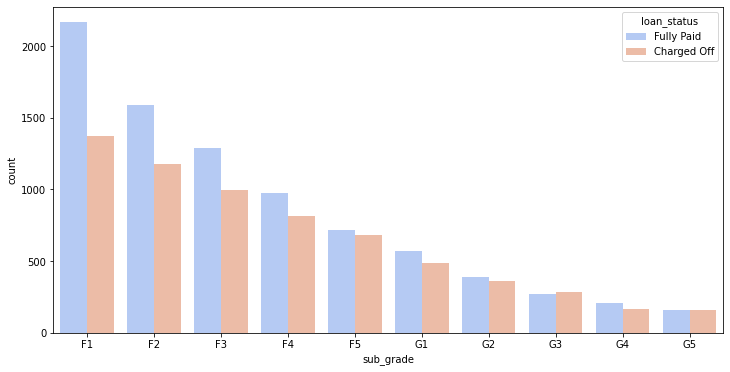

In [39]:
fg=df[(df['grade']=='G') | (df['grade']=='F')]

order=sorted(fg['sub_grade'].unique())

plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=fg,order=order,palette='coolwarm',hue='loan_status')

create new column from the loan status that is a 1 0 dummy column

In [40]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

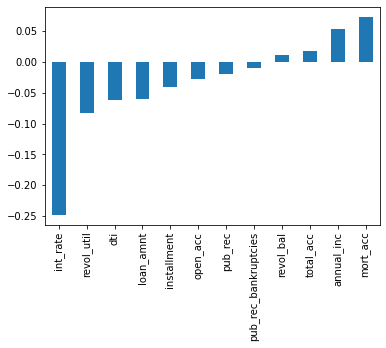

In [43]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [44]:
len(df)

396030

In [46]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [47]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [48]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [49]:
df['emp_title'].nunique()

173105

In [50]:
df = df.drop('emp_title',axis=1)

In [53]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [54]:
len_order=['< 1 year',
    '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

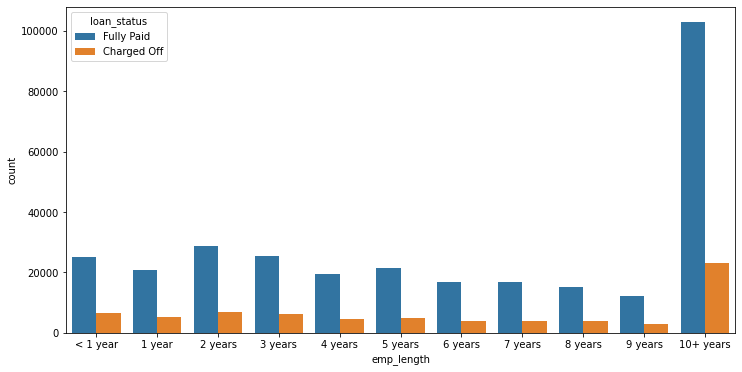

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order=len_order,hue='loan_status')

In [62]:
emp_co= df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [63]:
emp_fp= df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [65]:
emp_co/(emp_fp+emp_co)

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

employment length does not differentiate greatly dependent on loan status

In [66]:
df = df.drop('emp_length',axis=1)

In [67]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [68]:
df=df.drop('title',axis=1)

In [69]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [72]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [74]:
tot_acc_avg=df.groupby('total_acc').mean()['mort_acc']

In [78]:
def fill_mort(total_acc,mort_acc):
    
    if np.isnan(mort_acc):
        return tot_acc_avg[total_acc]
    else:
        return mort_acc

In [79]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']),axis=1)

In [80]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [81]:
df=df.dropna()

In [83]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

removed all null values from data set

working with cleaning the none numeric columns.

In [85]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [86]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

grade is just a coarser categorization of subgrade

In [87]:
df=df.drop('grade',axis=1)

In [88]:
dummy=pd.get_dummies(df['sub_grade'],drop_first=True)

df=pd.concat([df.drop('sub_grade',axis=1),dummy],axis=1)

In [89]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [92]:
dummy=pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df=pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummy],axis=1)

In [93]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [94]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [95]:
dummy=pd.get_dummies(df['home_ownership'],drop_first=True)

df=pd.concat([df.drop('home_ownership',axis=1),dummy],axis=1)

In [96]:
df['zip_code'] =df['address'].apply(lambda x: x[-5:])

In [97]:
dummy=pd.get_dummies(df['zip_code'],drop_first=True)

df=pd.concat([df.drop('zip_code',axis=1),dummy],axis=1)

In [98]:
df=df.drop('address',axis=1)

In [100]:
df=df.drop('issue_d',axis=1)

In [102]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [111]:
df=df.drop('earliest_cr_line',axis=1)

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
df=df.drop('loan_status',axis=1)

In [112]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler= MinMaxScaler()

In [114]:
X_train = scaler.fit_transform(X_train)

In [115]:
X_test = scaler.transform(X_test)

In [117]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [118]:
X_train.shape

(316175, 78)

In [119]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [120]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2991 - val_loss: 0.2647
Epoch 2/25
316175/316175 [==============================] - 5s 16us/sample - loss: 0.2650 - val_loss: 0.2625
Epoch 3/25
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2625 - val_loss: 0.2621
Epoch 4/25
316175/316175 [==============================] - 8s 24us/sample - loss: 0.2616 - val_loss: 0.2624
Epoch 5/25
316175/316175 [==============================] - 7s 24us/sample - loss: 0.2609 - val_loss: 0.2614
Epoch 6/25
316175/316175 [==============================] - 8s 25us/sample - loss: 0.2604 - val_loss: 0.2619
Epoch 7/25
316175/316175 [==============================] - 7s 24us/sample - loss: 0.2598 - val_loss: 0.2622
Epoch 8/25
316175/316175 [==============================] - 8s 26us/sample - loss: 0.2596 - 

In [121]:
from tensorflow.keras.models import load_model

In [122]:
model.save('lendingmodel.h5')

In [123]:
lose = pd.DataFrame(model.history.history)

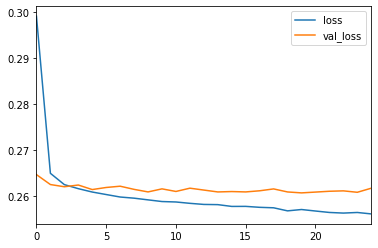

In [124]:
lose.plot()

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
pred=model.predict_classes(X_test)

In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.44      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [128]:
print(confusion_matrix(y_test,pred))

[[ 6817  8841]
 [   75 63311]]
